In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Timing helper function
def time_function(func, func_name=''):
    start_time = time.time()
    result = func()
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{func_name} took {elapsed_time:.4f} seconds")
    return result

In [3]:
# Function to load and prepare data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

In [4]:
# Function to select features and target variable
def prepare_data(data):
    X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']].values
    y = data['SalePrice'].values
    return X, y

In [5]:
# Function to train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [6]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R-squared: {r2:.2f}')
    
    return y_pred

In [7]:
# Function for predicting the price of a house
def predict_house_price(model, features):
    predicted_price = model.predict(features)
    return predicted_price


In [8]:
# Function for plotting the results
def plot_results(X_test, y_test, y_pred, model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Prices', alpha=0.5)  # Actual Prices
    plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Prices', alpha=0.5)  # Predicted Prices

    # Create a range of values for GrLivArea for the prediction line
    gr_liv_area_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100).reshape(-1, 1)

    # Prepare the input for predictions by combining with other feature means
    mean_features = np.mean(X_test, axis=0)[1:]  # Get the means of BedroomAbvGr, FullBath, HalfBath
    mean_features = np.append(gr_liv_area_range, np.tile(mean_features, (gr_liv_area_range.shape[0], 1)), axis=1)

    # Get predictions for the prediction line
    predicted_line = model.predict(mean_features)

    # Plot the prediction line
    plt.plot(gr_liv_area_range, predicted_line, color='green', linewidth=2, label='Prediction Line')

    plt.title('House Price Prediction')
    plt.xlabel('Ground Living Area (sq ft)')
    plt.ylabel('Sale Price')
    plt.legend()
    plt.grid()
    plt.show()

In [9]:
# Main execution
train_file_path = 'D:/MY PROJECTS/internship3/Task1/Data1/train.csv'
test_file_path = 'D:/MY PROJECTS/internship3/Task1/Data1/test.csv'  # Add path to your test.csv


Data loaded successfully!
Loading Training Data took 0.0110 seconds
Preparing Training Data took 0.0010 seconds
Training the Model took 0.0200 seconds
Mean Squared Error: 2810942965.22
Mean Absolute Error: 36018.56
R-squared: 0.63
Evaluating the Model took 0.0010 seconds
Data loaded successfully!
Loading Test Data took 0.0130 seconds
Predicting House Prices took 0.0000 seconds
   House_Index  Predicted_Price
0            1    121423.030985
1            2    143380.870622
2            3    204748.668874
3            4    202205.354725
4            5    191336.364775


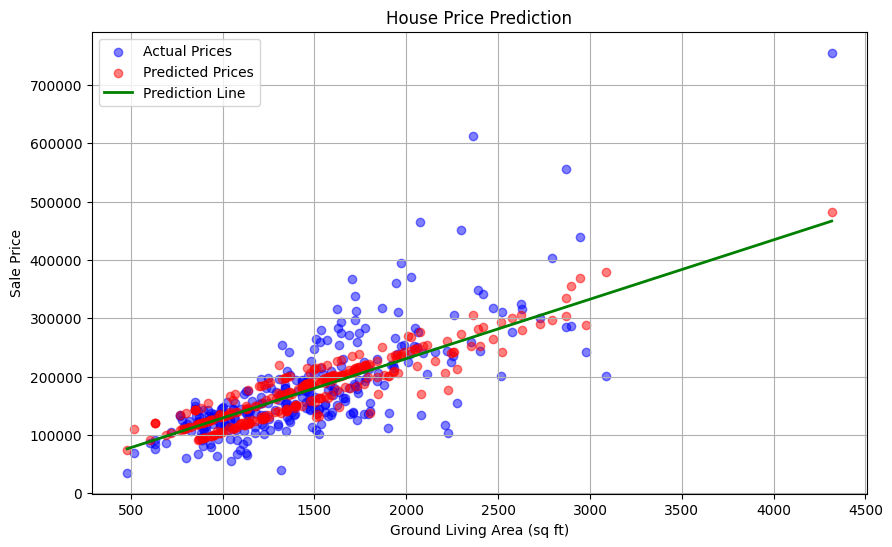

Plotting Results took 0.1766 seconds


In [10]:
# Load and prepare the training data
train_data = time_function(lambda: load_data(train_file_path), 'Loading Training Data')  # Load the training data
if train_data is not None:
    # Prepare training data
    X_train, y_train = time_function(lambda: prepare_data(train_data), 'Preparing Training Data')  # Prepare the data for training

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the model
    model = time_function(lambda: train_model(X_train, y_train), 'Training the Model')  # Train the linear regression model

    # Evaluate the model
    y_pred = time_function(lambda: evaluate_model(model, X_test, y_test), 'Evaluating the Model')  # Evaluate model performance

    # Load the test data for prediction
    test_data = time_function(lambda: load_data(test_file_path), 'Loading Test Data')  # Load the test data
    if test_data is not None:
        # Prepare test data for prediction
        example_features = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']].values

        # Make predictions for the loaded test data
        predicted_prices = time_function(lambda: predict_house_price(model, example_features), 'Predicting House Prices')  # Predict house prices
        
        # Create a Pandas DataFrame for the predicted prices
        predicted_prices_df = pd.DataFrame({
            'House_Index': np.arange(1, len(predicted_prices) + 1),  # Add an index for reference
            'Predicted_Price': predicted_prices
        })

        # Save the predicted prices to a CSV file
        output_file_path = 'D:/MY PROJECTS/internship3/Task1/Data1/predicted_prices_pandas.csv'
        predicted_prices_df.to_csv(output_file_path, index=False)

        # Show the head of the DataFrame
        print(predicted_prices_df.head())  # Display the first few rows of predicted prices

    # Plot results
    time_function(lambda: plot_results(X_test, y_test, y_pred, model), 'Plotting Results')  # Plot the results of the model